In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import prism, noise, plot_3D, auxiliars, salve_doc, filtering, sphere

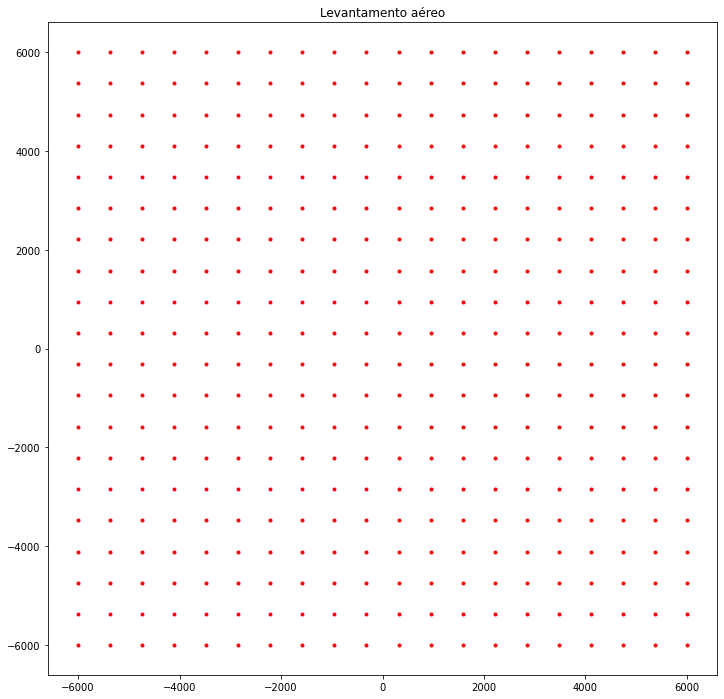

In [2]:
nx = 20 # n de observacoes na direcao x
ny = 20 # n de observacoes na direcao y
size = (nx, ny)

xmin = -6000.0 # metros
xmax = +6000.0 # metros
ymin = -6000.0 # metros
ymax = +6000.0 # metros
z = -50.0 #altura de voo, (com Z constante) em metros

dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**dicionario)

In [3]:
#Informations about the model - sphere
model = [0., 0., 600., 100., 2.]
# Inclination and declination (source and field)
incf, decf = 55., -48.

In [4]:
# Calculating the total field anomaly
tfa = sphere.sphere_tfa(X, Y, Z, model, 2., 6.0, incf, decf)
tfa_pole = sphere.sphere_tfa(X, Y, Z, model, 2., 6.0, 90.0, 0.0)

201.06192982974676
201.06192982974676


In [5]:
# Calculate the reduce to pole
rtp = filtering.reduction(X.reshape(size), X.reshape(size), tfa.reshape(size), incf, decf)
shape = size

/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/../modules/auxiliars.py:451: RuntimeWarning: invalid value encountered in true_divide
  theta = z + ((x*u + y*v)/k)*1j


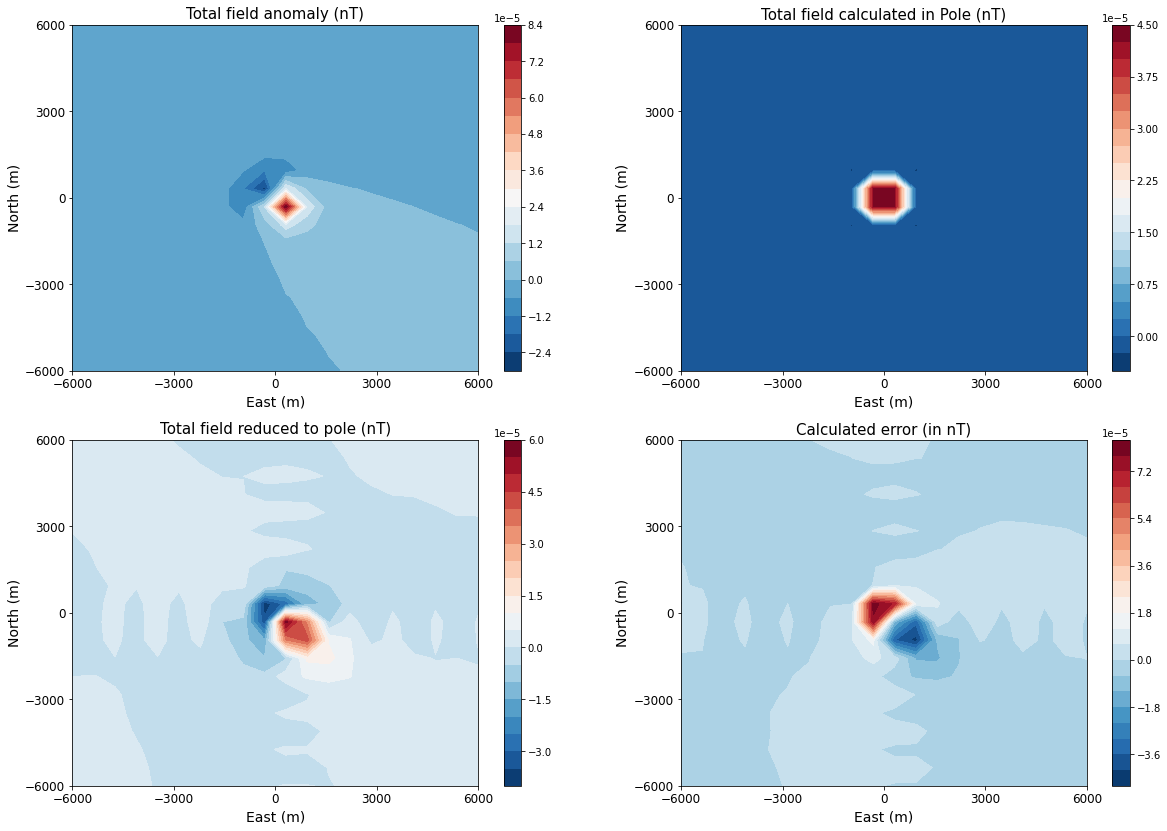

In [6]:
# Plotting all results
plt.close('all')
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.title('Total field anomaly (nT)', fontsize = 15)
plt.contourf(Y.reshape(shape), X.reshape(shape), tfa.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(X.min(), X.max(), 5), fontsize = 12)
plt.yticks(np.linspace(X.min(), Y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Total field calculated in Pole (nT)', fontsize = 15)
plt.contourf(Y.reshape(shape), X.reshape(shape), tfa_pole.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(X.min(), X.max(), 5), fontsize = 12)
plt.yticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Total field reduced to pole (nT)', fontsize = 15)
plt.contourf(Y.reshape(shape), X.reshape(shape), rtp.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(X.min(), X.max(), 5), fontsize = 12)
plt.yticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 12)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Calculated error (in nT)', fontsize = 15)
plt.contourf(Y.reshape(shape), X.reshape(shape), (tfa_pole.reshape(shape) - rtp.reshape(shape)), 20, cmap = plt.cm.RdBu_r)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.linspace(X.min(), X.max(), 5), fontsize = 12)
plt.yticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 12)
plt.colorbar()

#plt.savefig('figures/reduction-sphere.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()